## 특정 지역 데이터 뽑아보기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

#한글 폰트 설정
#matplotlib에서는 한글폰트가 깨지기 때문에
plt.rc('font', family='Malgun Gothic')
#마이너스 기호가 표시되도록 해줌
plt.rc('axes', unicode_minus=False)

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df=pd.read_csv('소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', encoding='cp949')

In [3]:
city=df["시도명"].value_counts()
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [8]:
#경기도 데이터
df_kyonggi=df[df["시도명"]=="경기도"].copy()
df_kyonggi.shape
df_kyonggi
df_kyonggi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21374 entries, 0 to 91331
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     21374 non-null  int64  
 1   상호명        21374 non-null  object 
 2   지점명        419 non-null    object 
 3   상권업종대분류코드  21374 non-null  object 
 4   상권업종대분류명   21374 non-null  object 
 5   상권업종중분류코드  21374 non-null  object 
 6   상권업종중분류명   21374 non-null  object 
 7   상권업종소분류코드  21374 non-null  object 
 8   상권업종소분류명   21374 non-null  object 
 9   표준산업분류코드   20307 non-null  object 
 10  표준산업분류명    20307 non-null  object 
 11  시도코드       21374 non-null  float64
 12  시도명        21374 non-null  object 
 13  시군구코드      21374 non-null  float64
 14  시군구명       21374 non-null  object 
 15  행정동코드      21374 non-null  int64  
 16  행정동명       21374 non-null  object 
 17  법정동코드      21374 non-null  float64
 18  법정동명       21374 non-null  object 
 19  지번코드       21374 non-null  float64
 20  대지구분코드

<AxesSubplot:>

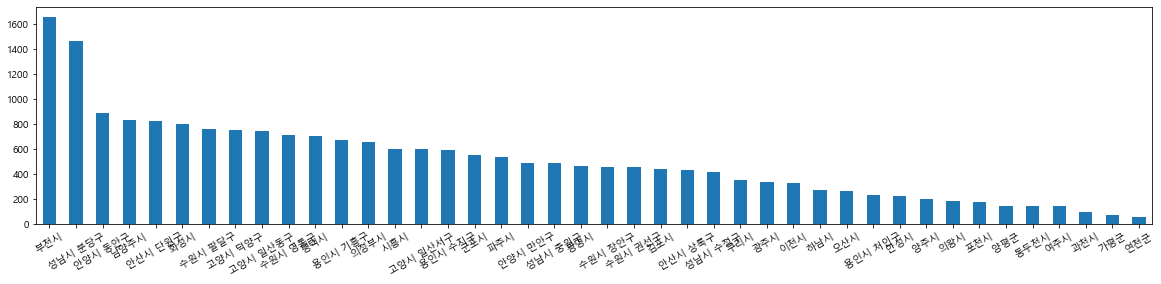

In [11]:
#시군구명 시각화
df_kyonggi["시군구명"].value_counts().plot.bar(figsize=(20,4), rot=30)

<AxesSubplot:xlabel='시군구명', ylabel='count'>

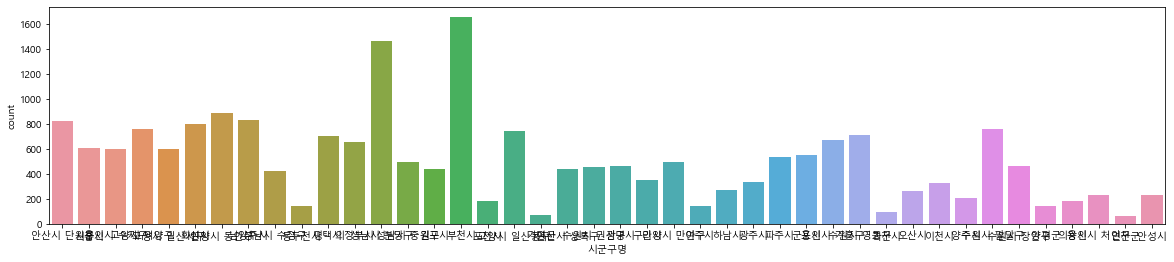

In [12]:
#seaborn
plt.figure(figsize=(20,4))
sns.countplot(data=df_kyonggi, x="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

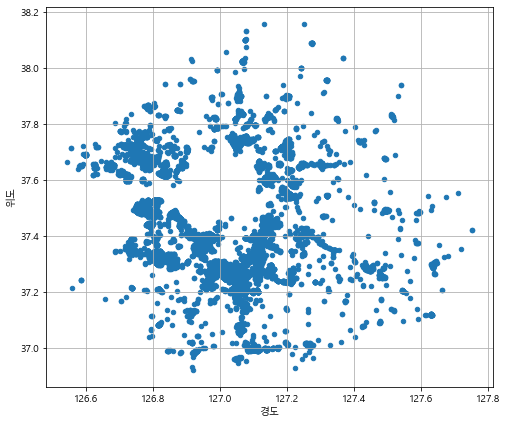

In [13]:
#pandas의 plot.scatter를 통해 경도와 위도 표시
df_kyonggi[["경도", "위도", "시군구명"]].plot.scatter(x="경도", y="위도", figsize=(8,7), grid=True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

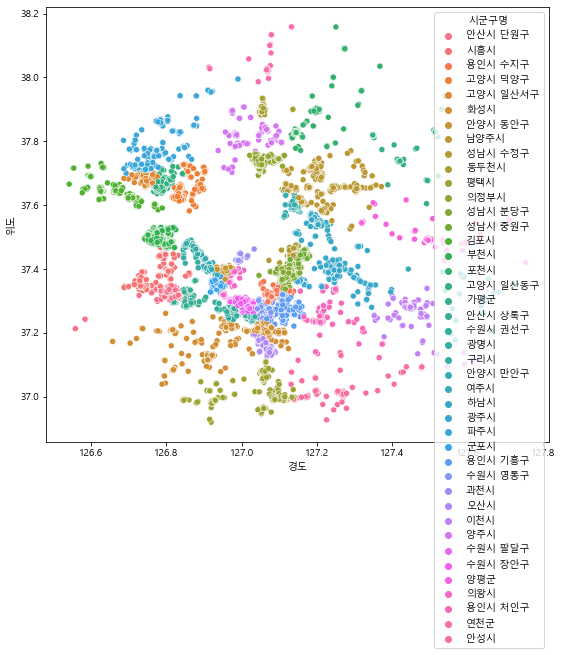

In [14]:
#seaborn의 scatterplot
#hue:색으로 구분할 수 있게 해줌
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_kyonggi, x="경도", y="위도", hue="시군구명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

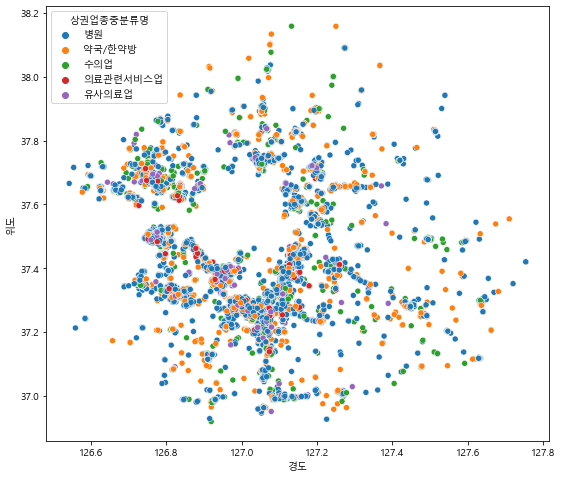

In [15]:
#seaborn의 scatterplot을 이용해 "상권업종중분류명" 경도와 위도 표시
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_kyonggi, x="경도", y="위도", hue="상권업종중분류명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

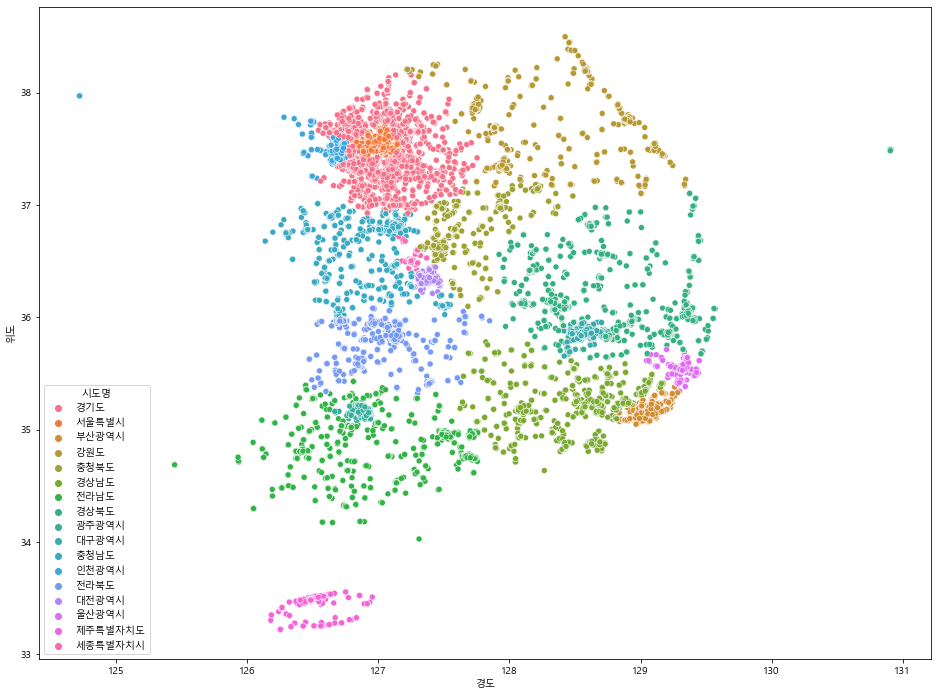

In [16]:
#전국 데이터(df)로 구별 경도와 위도를 표시
plt.figure(figsize=(16,12))
sns.scatterplot(data=df, x="경도", y="위도", hue="시도명")

## 지역만 바꿔서 적용한다면 특정지역을 plot해볼 수 있음!

In [17]:
#서울에 있는 데이터의 위도와 경도 보기
df_seoul=df[df["시도명"]=="서울특별시"].copy()
df_seoul.shape

(18943, 39)